In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Setup:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 400)

YEAR = 2021

data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_' + str(YEAR) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)
data.to_csv('nfl_data.csv.gz', compression='gzip', index=False)
    
data = pd.read_csv('nfl_data.csv.gz', compression='gzip', low_memory=False)

In [5]:
def plot_data(team_name, stat, side = "offense"):
    df = data.copy()
    if side == "offense": 
        if stat == "epa":
            df = df.loc[(df.play_type.isin(['run','pass'])) 
                        & (df.posteam == team_name)].groupby(["week", "defteam"],as_index = False)[['epa']].mean()
            
        
        if stat == "pass_epa":
            df = df.loc[(df['pass']==1) & (df.posteam == team_name)].groupby(["week", "defteam"],as_index = False)[['epa']].mean()
        
        if stat == "rush_epa":
            df = df.loc[(df['rush']==1) & (df.posteam == team_name)].groupby(["week", "defteam"],as_index = False)[['epa']].mean()
            
        
        if stat == "success":
            df = df.loc[(df.play_type.isin(['run','pass'])) 
                        & (df.posteam == team_name)].groupby(["week", "defteam"],as_index = False)[['success']].mean()
        
        if stat == "pass_success":
             df = df.loc[(df['pass']==1) & (df.posteam == team_name)].groupby(["week", "defteam"],as_index = False)[['success']].mean()
        
        if stat == "rush_success":
             df = df.loc[(df['rush']==1) & (df.posteam == team_name)].groupby(["week", "defteam"],as_index = False)[['success']].mean()
        
        opp = df["defteam"]
    
    if side == "defense":
        
        if stat == "epa":
            df = df.loc[(df.play_type.isin(['run','pass'])) 
                        & (df.defteam == team_name)].groupby(["week", "posteam"],as_index = False)[['epa']].mean()
        
        if stat == "pass_epa":
             df = df.loc[(df['pass']==1) & (df.defteam == team_name)].groupby(["week", "posteam"],as_index = False)[['epa']].mean()
            
        
        if stat == "rush_epa":
            df = df.loc[(df['rush']==1) & (df.defteam == team_name)].groupby(["week", "posteam"],as_index = False)[['epa']].mean()
        
        if stat == "success":
            df = df.loc[(df.play_type.isin(['run','pass'])) 
                        & (df.defteam == team_name)].groupby(["week", "posteam"],as_index = False)[['success']].mean()
        
        if stat == "pass_success":
             df = df.loc[(df['pass']==1) & (df.defteam == team_name)].groupby(["week", "posteam"],as_index = False)[['success']].mean()
        
        if stat == "rush_success":
             df = df.loc[(df['rush']==1) & (df.defteam == team_name)].groupby(["week", "posteam"],as_index = False)[['success']].mean()    
    
        opp = df["posteam"]
    
    if "epa" in stat:
        to_plot = df["epa"]
    else:
        to_plot = df["success"]
    
    week = df["week"]
    
    fig, ax = plt.subplots(figsize=(15,15))
    
    for i in range(len(week)):
        x = week[i]
        y = to_plot[i]
        plt.scatter(x,y, s = 200, c = "k")
        plt.text(x + 0.25, y , opp[i], fontsize=12)
    ax.grid(zorder=0,alpha=.4)
    ax.set_axisbelow(True)
    ax.set_xlabel("Week", fontsize = 16)
    ax.set_ylabel(f'{stat}', fontsize = 16)
    ax.set_title(f'{team_name} {side} {stat}', fontsize = 20)
    ax.set_xticks(np.arange(0, len(week) + 3, 1))
    
    
    return df


,week,posteam,epa
0,1,ARI,0.185100
1,2,SEA,0.154594
2,3,IND,-0.045294
3,4,NYJ,0.029418
4,5,JAX,-0.063518
5,6,BUF,0.121167
6,7,KC,-0.100877
7,8,IND,-0.140615
8,9,LA,-0.242477
9,10,NO,0.111866


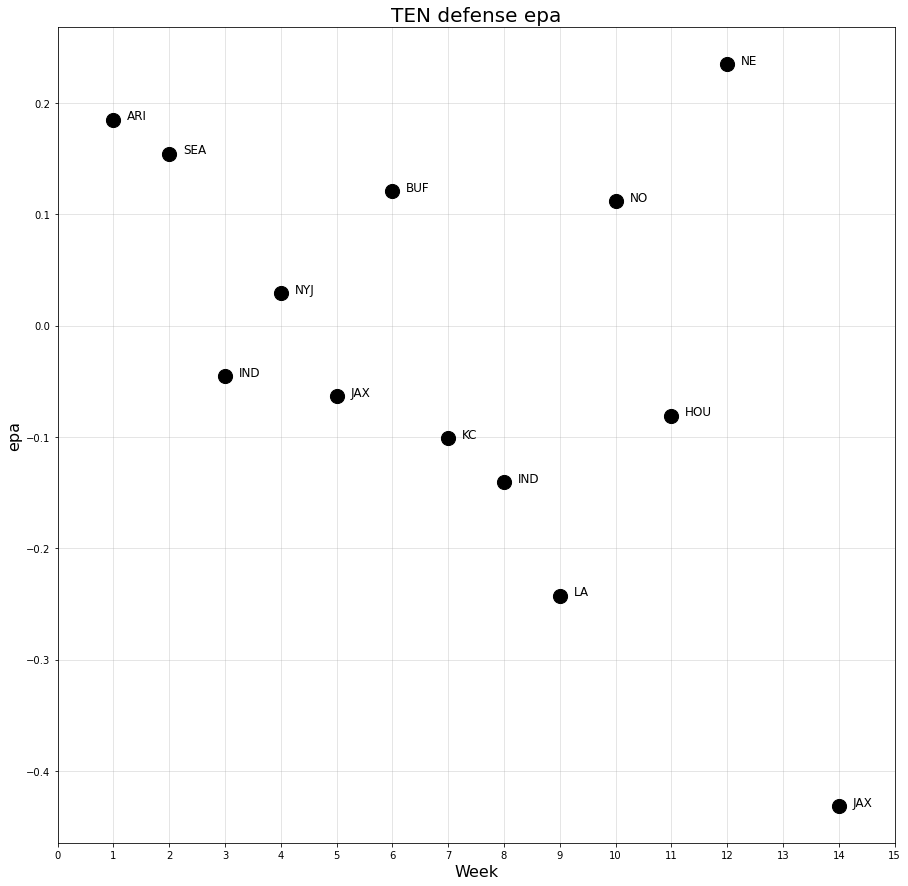

In [9]:
#Tests:
# plot_data("NE", "pass_success", "offense")
# plot_data("CAR", "rush_success", "offense")
# plot_data("ARI", "success", "offense")
# plot_data("DET", "pass_success", "defense")
# plot_data("JAX", "rush_success", "defense")
# plot_data("MIN", "success", "defense")
# plot_data("NO", "epa", "offense")
# plot_data("CLE", "rush_epa", "offense")
# plot_data("GB", "pass_epa", "offense")
# plot_data("TEN", "epa", "defense")
# plot_data("CHI", "pass_epa", "defense")
# plot_data("DAL", "rush_epa", "defense")